### In this notebook I provide simple clustering solution for wine dataset.

In [1]:
!pip install kneed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

rcParams['figure.figsize'] = 18, 14



First of all, look at our data.

In [2]:
data = pd.read_csv('../input/wine-dataset-for-clustering/wine-clustering.csv')
print(data.head())
print()
print('Shape:')
print(data.shape)

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

Then let's find out how many missing values are in the data and number of unique values.

In [3]:
print(data.info())
print('Number of unique values:')
print(data.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None
Number of unique values:
Alcohol                 126
Malic_Acid          

Very nice data :) Now it's time to visualize data distribution.

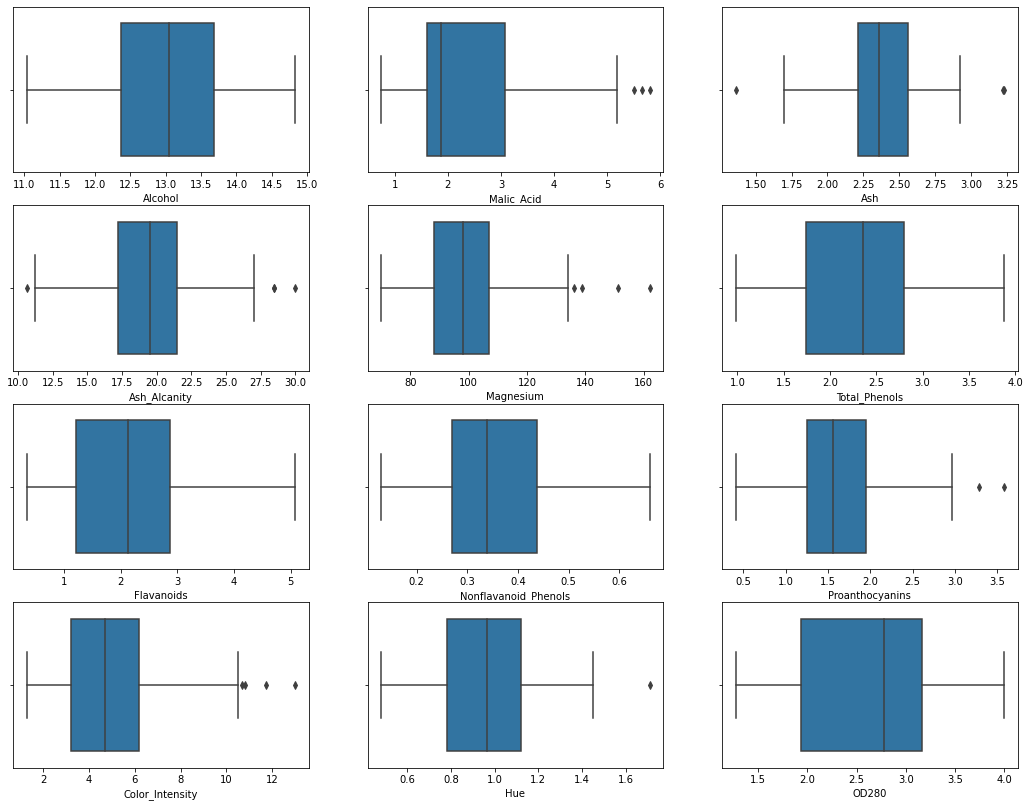

In [4]:
f, axes = plt.subplots(4, 3)
for column, ax in zip(data.columns, axes.flatten()):
        sns.boxplot(x=data[column], ax=ax)

We see that distributions are almost perfect and we don't need to deal with outliers. There are only numerical columns, that's why let's build corr matrix for our dataset.

<AxesSubplot:>

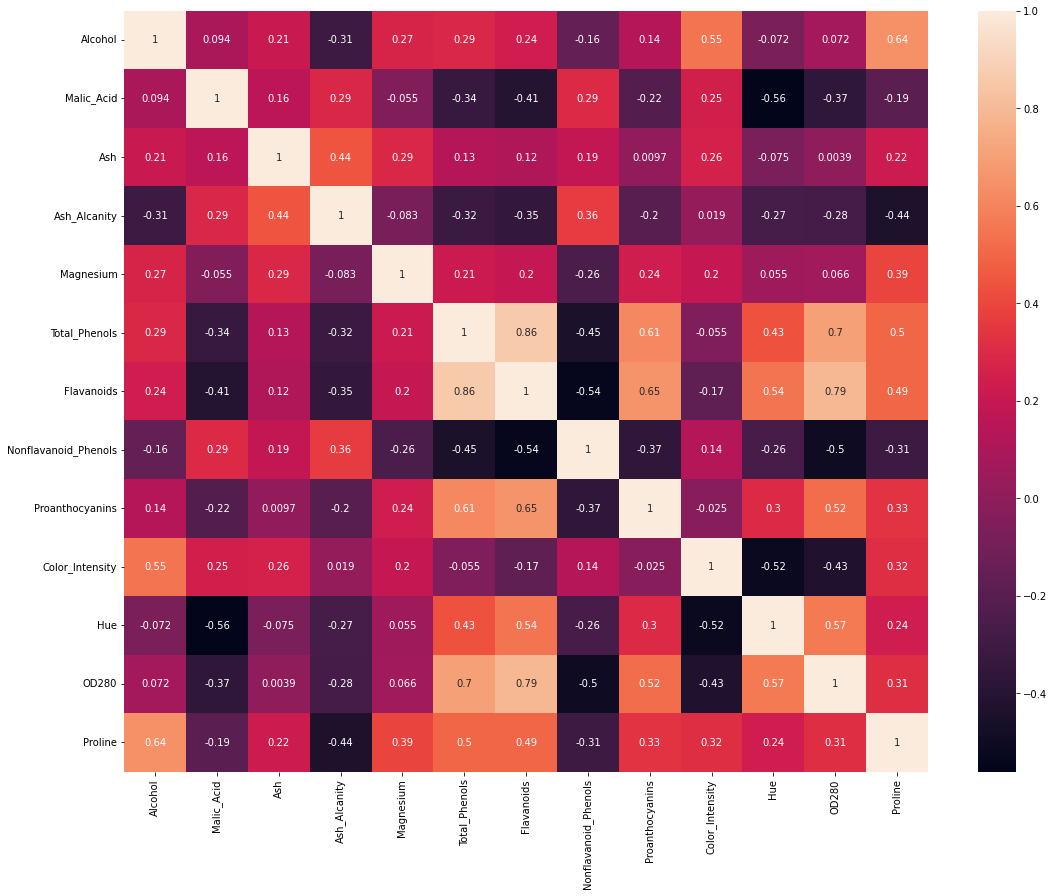

In [5]:
corr = data.corr()
sns.heatmap(corr, annot=True)

We did a short research and now let's get down to our topic. As we saw earlier wine dataset is quite small and using PCA is not necessary. But why not to implement this method and look at the results.

In [6]:
pca = PCA()
pca.fit(data)
np.set_printoptions(precision=7, suppress=True)
print(pca.explained_variance_ratio_)
pca = PCA(n_components=2)
print()
data = pca.fit_transform(data)
print(pca.explained_variance_ratio_)




[0.9980912 0.0017359 0.000095  0.0000502 0.0000124 0.0000085 0.0000028
 0.0000015 0.0000011 0.0000007 0.0000004 0.0000002 0.0000001]

[0.9980912 0.0017359]


One of the most important tasks is choosing number of components in PCA. We fit our model and using varience_ratio to saw, how our components describe data varience. Using only 2 components we can get 99,9% of our dataset varience in this case. Second important task is choosing cluster number in our KMeans algorithm. For this we will use elbow method and get sum of squared distances of samples to their closest cluster center as a metric.

Text(0, 0.5, 'WCSS')

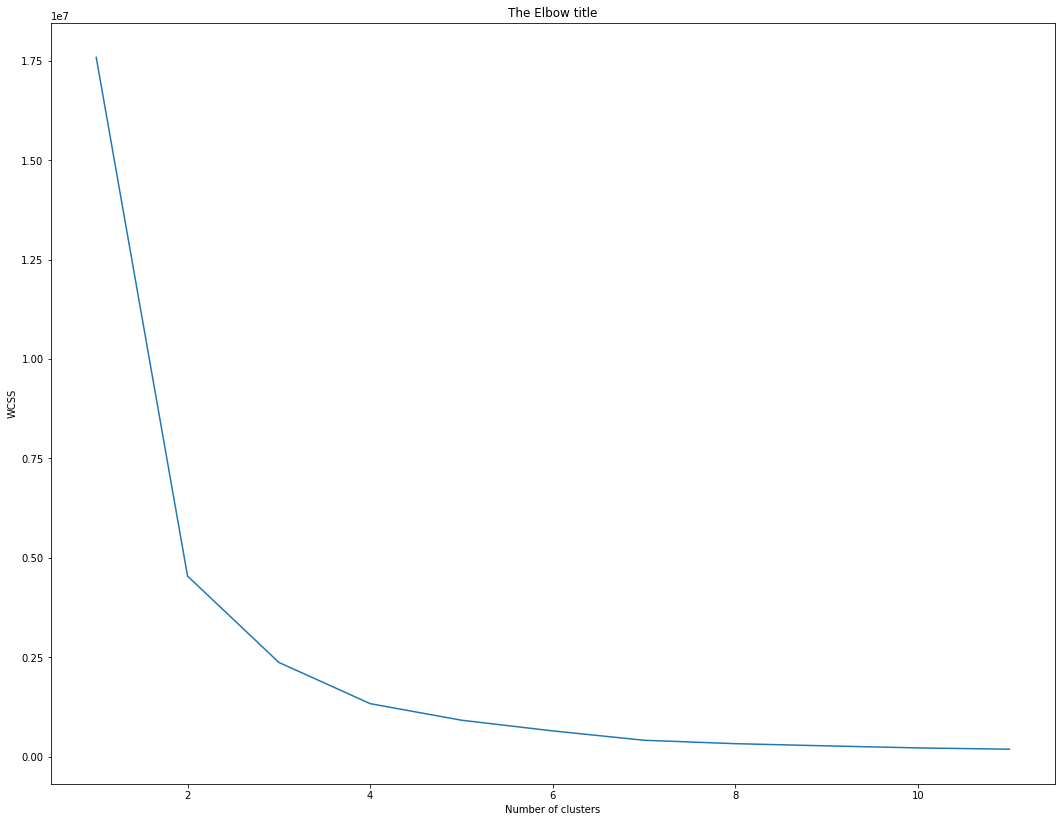

In [7]:
wcss=[]
for i in range(1,12):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,12)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

We get our curve and now can make predictions how many clusters are the best suited for our data. Or we can do it automatically.

In [8]:
kl = KneeLocator(range(1, 12), wcss, curve="convex", direction="decreasing")
print('Best number of clusters:', kl.elbow)

Best number of clusters: 3


Best number of clusters is 3. Now we can use one more metric to define cluster number - Silhouette Coefficient. Plot our clusters with their silhouette score. Choose 3,4,5 and 6 clusters to get results.

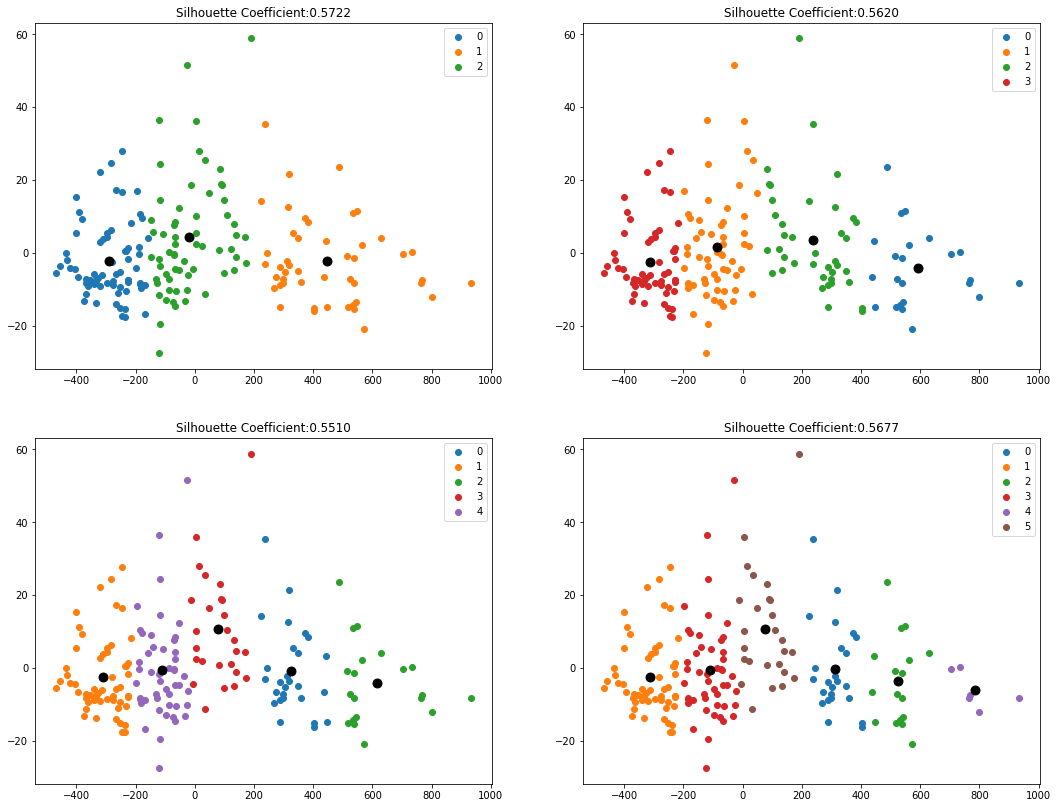

In [9]:
fig, ax = plt.subplots(2, 2)
ax = np.ravel(ax)
cluster_number = 3
for i in range(4):
    km = KMeans(n_clusters=cluster_number, random_state=0)
    labels = km.fit_predict(data)
    u_labels = np.unique(labels)
    centroids = km.cluster_centers_
    for j in u_labels:
        ax[i].scatter(data[labels == j , 0] , data[labels == j , 1] , label = j)
    ax[i].legend()
    ax[i].scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    ax[i].set_title('Silhouette Coefficient:' + str(silhouette_score(data, labels))[:6])
    cluster_number += 1
    


Another metric shows us that the best number of clusters is 3. In conclusion we see that using only two PCA components and three clusters we get pretty good results in this clustering task.